<a href="https://colab.research.google.com/github/Hanno-stud/task7-day7-Elevate-Labs/blob/main/SVMs_for_linear_%26_non_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving breast-cancer.csv to breast-cancer.csv

🔹 Linear Kernel Performance
[[72  0]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Fitting 5 folds for each of 16 candidates, totalling 80 fits

✅ Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

🔹 RBF Kernel Performance
[[70  2]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



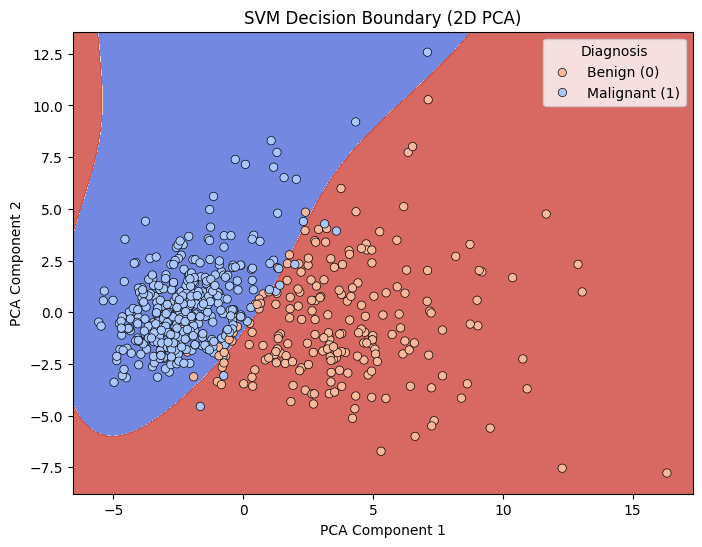

Cross-validation accuracy: 0.9684 




In [1]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

# ===============================
# 📂 Step 2: Load and Prepare Dataset
# ===============================
def load_and_preprocess_data():

  # Import 'google.colab' python module for uploading any file-type
  from google.colab import files
  uploaded = files.upload()  # Upload breast-cancer.csv here

  df = pd.read_csv('breast-cancer.csv')  # Ensure correct file name

  # Encode target variable (Malignant = 1, Benign = 0)
  df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

  # Drop 'id' column if it exists
  if 'id' in df.columns:
      df = df.drop(['id'], axis=1)

  # Check for missing values
  if df.isnull().sum().sum() != 0:
      raise ValueError("Dataset contains missing values.")

  return df

# ===============================
# 📊 Step 3: Feature Scaling and Data Splitting
# ===============================
def split_and_scale_data(df):
  X = df.drop('diagnosis', axis=1)
  y = df['diagnosis']

  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

  return X_train, X_test, y_train, y_test, X_scaled, y

# ===============================
# 🔍 Step 4: Train and Evaluate Linear SVM
# ===============================
def train_linear_svm(X_train, X_test, y_train, y_test):
  linear_svm = SVC(kernel='linear')
  linear_svm.fit(X_train, y_train)
  y_pred = linear_svm.predict(X_test)

  print("\n🔹 Linear Kernel Performance")
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

# ===============================
# 🔍 Step 5: Train and Tune RBF SVM with GridSearchCV
# ===============================
def train_rbf_svm(X_train, X_test, y_train, y_test):
  param_grid = {
      'C': [0.1, 1, 10, 100],
      'gamma': [1, 0.1, 0.01, 0.001],
      'kernel': ['rbf']
  }

  grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
  grid.fit(X_train, y_train)

  print("\n✅ Best Parameters:", grid.best_params_)

  y_pred = grid.predict(X_test)
  print("\n🔹 RBF Kernel Performance")
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  return grid

# ===============================
# 📈 Step 6: PCA and Decision Boundary Plotting
# ===============================
def apply_pca_and_plot(X_scaled, y, best_model):
  pca = PCA(n_components=2)
  X_pca = pca.fit_transform(X_scaled)

  X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

  svm_2d = SVC(kernel='rbf', C=best_model.best_params_['C'], gamma=best_model.best_params_['gamma'])
  svm_2d.fit(X_train_pca, y_train)

  plot_decision_boundary(svm_2d, X_pca, y)

# ===============================
# ⚙️ƒ🛠️🦾 Step 7: Decision Boundary Function
# ===============================
def plot_decision_boundary(clf, X, y):
  h = .02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
  plt.title('SVM Decision Boundary (2D PCA)')
  plt.xlabel('PCA Component 1')
  plt.ylabel('PCA Component 2')
  plt.legend(title='Diagnosis', labels=['Benign (0)', 'Malignant (1)'])
  plt.show()

# ===============================
# 🔁 Step 8: Cross-Validation
# ===============================
def perform_cross_validation(best_model, X_scaled, y):
  scores = cross_val_score(best_model.best_estimator_, X_scaled, y, cv=5)
  print("Cross-validation accuracy:", np.round(scores.mean(), 4), "\n\n")

# ===============================
# 🚀 Final Execution Pipeline
# ===============================
def main():
  df = load_and_preprocess_data()
  X_train, X_test, y_train, y_test, X_scaled, y = split_and_scale_data(df)

  # Train Linear SVM
  train_linear_svm(X_train, X_test, y_train, y_test)

  # Train RBF SVM with GridSearchCV
  best_model = train_rbf_svm(X_train, X_test, y_train, y_test)

  # Apply PCA and Plot Decision Boundary
  apply_pca_and_plot(X_scaled, y, best_model)

  # Perform Cross-Validation
  perform_cross_validation(best_model, X_scaled, y)

# Run the complete pipeline
main()
